<h1 style="color:red; text-align:center; text-decoration:underline;">Algorithme Génétique</h1>


# Maximiser une fonction

Ce teste expose deux approches fondées sur les algorithmes génétiques, appliquées à la maximisation d’une fonction non linéaire. Ce cas d’étude constitue une introduction concrète à l’utilisation des méthodes évolutionnaires dans la résolution de problèmes d’optimisation complexes.

In [49]:
# j'importe les bibliothèques nécessaires
import matplotlib.pyplot as plt
import numpy as np
import math

## Le problème

Nous devons trouver la valeur de $x$ qui maximise la valeur de $𝑦$ dans la fonction suivante.

In [50]:
def fx(x):
    return -(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2

In [51]:
y_axis = []
x_axis=np.arange(0,2,0.02)

for num in x_axis:
    y_axis.append(fx(num))


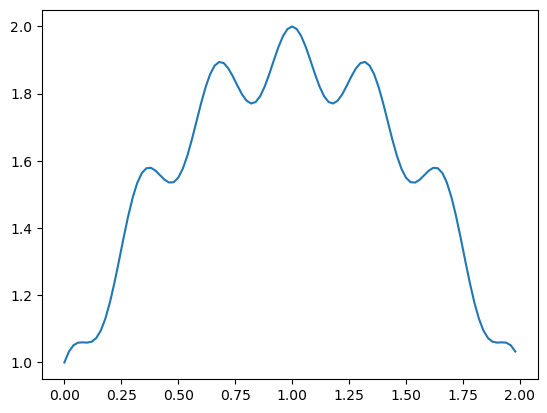

In [52]:
plt.plot(x_axis,y_axis)

Comme on peut le voir ci-dessus, la fonction a plusieurs maxima et minima locaux. L'objectif est d'atteindre le point le plus haut, qui se trouve à $x=1$.

J'ai ici mis en œuvre deux approches : une où les gènes sont représentés par des nombres décimaux et une autre où ils sont représentés par du code binaire. Cela produit des résultats intéressants, mais l'important est de comprendre les composants principaux de l'algorithme génétique. Je vais donc commencer par l'approche la plus évidente, puis je passerai au code binaire.

## Algorithmes génétiques

### Représentation des gènes

D'abord, nous devons définir ce que représentent les gènes de nos individus. Les gènes doivent avoir la capacité de résoudre le problème, même s'ils ne le font pas immédiatement ; et leur efficacité doit pouvoir être mesurée avec précision.

In [53]:
# individu exemple 
x = 0.54
y = fx(x)

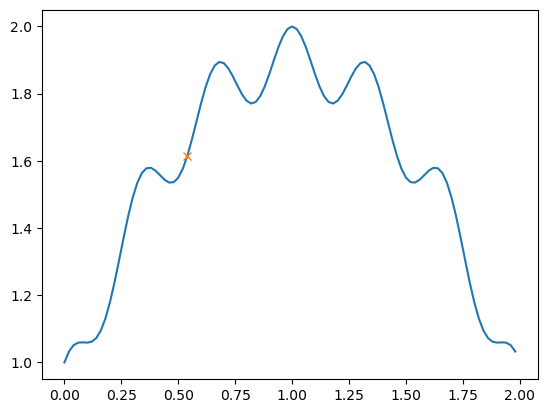

In [54]:
plt.plot(x_axis,y_axis)
plt.plot(x,y,'x')

L'individu exemple est représenté par un 'x' sur le graphique ci-dessus. Ainsi, notre population doit être composée de nombres allant de $0$ à $2$. Sachant cela, nos gènes peuvent représenter les valeurs décimales de ce nombre.

In [55]:
#individu exemple 
#x = 0.54
x = [0,5,4]

Nous devons représenter les gènes sous forme de liste pour pouvoir effectuer la mutation et le croisement. Nous devons donc gérer une fonction qui convertit une liste en nombre décimal.

In [56]:
def listToDecimal(num):
    decimal=0
    for i in range(len(num)):
        decimal+=num[i]*10**(-i)
    return decimal

In [57]:
listToDecimal(x)

0.54

Pour rendre cela plus intéressant, j'aimerais manipuler des individus avec un code génétique plus long. Je vais donc définir un `ind_size` avec lequel je générerai un premier code génétique aléatoire.

In [58]:
ind_size = 15
# Pool génétique
genetic_pool=[[0,1],[0,1,2,3,4,5,6,7,8,9]]

individuo = []
individuo += [np.random.choice(genetic_pool[0])]
individuo += list(np.random.choice(genetic_pool[1],ind_size-1))

individuo

[1, 5, 1, 0, 2, 9, 1, 1, 4, 0, 4, 4, 6, 6, 4]

Je viens de générer un individu dont le code génétique est composé de 15 gènes. Ces gènes ont été choisis dans un genetic_pool qui représente toutes les valeurs que les gènes peuvent prendre.
Comme notre individu est défini entre 0 et 2, j'ai décidé de créer un pool distinct où il ne peut prendre que [0,1] pour la partie entière. S'il prenait 2, il est très probable qu'il sorte de la plage de valeurs. La partie décimale utilise un pool de 0 à 9, donc la valeur maximale que l'individu peut prendre est 1.9999... et la minimale 0.0000...

In [59]:
listToDecimal(individuo)

1.51029114044664

En convertissant la liste en décimal, nous pouvons remarquer une petite variation à la fin, due à la manière dont Python effectue la somme en virgule flottante, mais rien de très important.

In [60]:
poblacion = []

for i in range(100):
    individuo = []
    individuo += [np.random.choice(genetic_pool[0])]
    individuo += list(np.random.choice(genetic_pool[1],ind_size-1))
    poblacion.append(individuo)
poblacion[:10]

[[1, 4, 1, 3, 2, 4, 7, 1, 7, 9, 1, 0, 5, 7, 1],
 [1, 1, 3, 7, 7, 0, 8, 4, 9, 5, 3, 5, 1, 1, 4],
 [0, 8, 9, 6, 3, 3, 2, 0, 3, 4, 6, 0, 1, 0, 3],
 [1, 9, 6, 3, 8, 8, 3, 1, 7, 5, 1, 7, 3, 6, 7],
 [0, 8, 4, 3, 0, 2, 0, 9, 3, 6, 4, 0, 1, 4, 3],
 [0, 0, 9, 1, 1, 2, 1, 8, 7, 5, 1, 5, 8, 8, 1],
 [0, 8, 1, 4, 0, 3, 3, 2, 2, 1, 8, 7, 3, 7, 1],
 [0, 6, 0, 4, 4, 9, 0, 1, 0, 2, 4, 0, 7, 6, 7],
 [1, 7, 9, 3, 5, 3, 9, 3, 4, 3, 9, 6, 7, 1, 8],
 [0, 4, 5, 5, 1, 6, 5, 4, 8, 1, 9, 6, 5, 5, 0]]

Finalement, je génère une population remplie d'individus avec des gènes aléatoires. De cette population, nous allons choisir les meilleurs pour les faire se reproduire.
Ci-dessous, vous observerez comment la population est répartie.

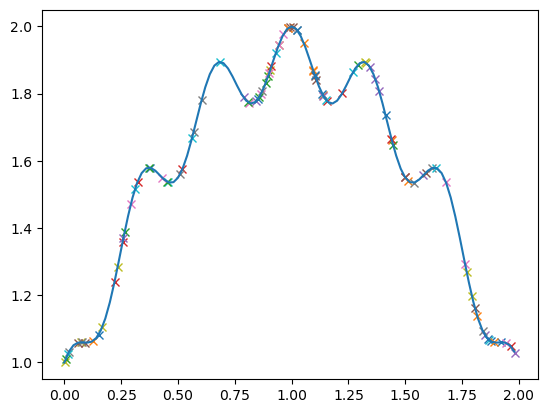

In [61]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

### Mesure du succès (Fitness)

Ceci est souvent appelé fitness. Ici, nous allons mesurer le succès de l'individu à atteindre l'objectif et déterminer la probabilité qu'il aura de se reproduire.
Puisque nous voulons maximiser une fonction, les individus qui produisent une valeur de 𝑦 plus élevée seront sélectionnés comme les meilleurs.

In [62]:
fitness =[]

# j'extrais les valeurs de y pour mesurer leur succès
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    fitness += [y]
    
# je convertis fitness en un vecteur pour réaliser des opérations
# plus facilement
fitness = np.array(fitness)

# je divise toutes les valeurs de y par la somme totale
# pour obtenir des valeurs entre 0 et 1
fitness=fitness/fitness.sum()

In [63]:
fitness

array([0.01109146, 0.01147423, 0.01183393, 0.00670112, 0.01135571,
       0.00676933, 0.01132338, 0.01139011, 0.00765005, 0.00982057,
       0.00677295, 0.00680473, 0.00982585, 0.00868378, 0.00691855,
       0.00743028, 0.00990791, 0.01271574, 0.01194631, 0.0121087 ,
       0.01009659, 0.01062059, 0.01204901, 0.01136355, 0.01155274,
       0.01176483, 0.01148786, 0.01008603, 0.01242153, 0.00681103,
       0.01150243, 0.01194309, 0.01009795, 0.01006424, 0.01143232,
       0.01184037, 0.0098275 , 0.0065893 , 0.00677389, 0.0106598 ,
       0.01272039, 0.01247101, 0.01134323, 0.01202012, 0.00656238,
       0.0067676 , 0.00826328, 0.00997155, 0.00811416, 0.0119163 ,
       0.00692232, 0.00727701, 0.00887383, 0.00991465, 0.00995043,
       0.00991844, 0.01188977, 0.01077856, 0.00820325, 0.00654287,
       0.0114108 , 0.01196164, 0.01053532, 0.00793029, 0.00875211,
       0.01000064, 0.01262823, 0.00677377, 0.00640466, 0.01009413,
       0.00679255, 0.00985096, 0.00646275, 0.01150867, 0.01146

Toutes les valeurs de 𝑦 sont divisées par la somme totale pour obtenir une probabilité. L'opération ci-dessus sert à représenter des pourcentages. Par exemple, si j'ai deux nombres : [8,5], lorsque je les divise par la somme, j'obtiens le pourcentage qu'ils représentent du total :

In [64]:
array = np.array([8,5])
array = array/array.sum()
array

array([0.61538462, 0.38461538])

Si je travaille avec des nombres dont la somme est dix, ce sera plus facile à visualiser.

In [65]:
array = np.array([8,2])
array = array/array.sum()
array

array([0.8, 0.2])

Les nombres les plus grands produisent un pourcentage plus élevé, et comme la probabilité se mesure entre 0 et 1, cela nous permet déjà de donner une plus grande probabilité de reproduction aux meilleurs individus, ceux qui ont obtenu des valeurs de 𝑦 plus élevées.

### Croisement

Le croisement consiste à mélanger les gènes des meilleurs individus. Dans ce cas, nous allons choisir deux parents au hasard, selon la probabilité du fitness, pour qu'ils produisent un nouvel individu.
Il est important de ne pas écarter complètement les pires individus car, peut-être, leur code génétique pourra servir à obtenir quelque chose de mieux plus tard.
Ensuite, un cross_point (point de croisement) est choisi, à partir duquel les gènes des parents seront combinés. On copiera les gènes du premier parent jusqu'à ce point, puis les gènes de l'autre parent.


In [66]:
size_poblacion = len(poblacion)
# descendants
offspring = []
for i in range(size_poblacion//2):
    parents = np.random.choice(size_poblacion, 2, p=fitness)
    cross_point = np.random.randint(ind_size)
    offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
    offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]

In [67]:
offspring[:10]

[[1, 5, 1, 0, 1, 8, 8, 3, 5, 2, 5, 7, 0, 9, 4],
 [0, 0, 0, 6, 0, 0, 5, 6, 0, 5, 8, 6, 2, 3, 6],
 [1, 3, 2, 4, 8, 3, 7, 3, 3, 0, 6, 2, 4, 8, 6],
 [1, 5, 9, 0, 7, 8, 0, 7, 7, 8, 5, 0, 2, 0, 5],
 [0, 2, 5, 6, 3, 4, 1, 9, 3, 0, 7, 9, 2, 4, 1],
 [1, 5, 3, 7, 9, 7, 4, 8, 4, 9, 1, 2, 5, 8, 3],
 [0, 9, 9, 1, 4, 7, 6, 7, 2, 5, 9, 2, 9, 2, 4],
 [1, 8, 8, 5, 7, 2, 8, 0, 8, 0, 5, 1, 6, 5, 3],
 [1, 3, 8, 5, 0, 5, 6, 3, 1, 2, 8, 8, 3, 0, 2],
 [1, 3, 8, 5, 0, 5, 6, 3, 1, 2, 8, 8, 3, 0, 2]]

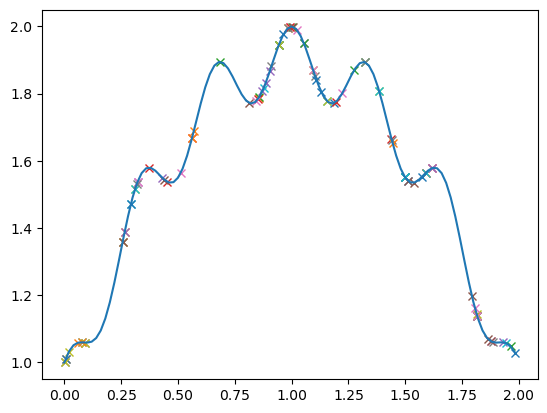

In [68]:
poblacion = offspring
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

En une seule génération, nous pouvons voir que les individus se concentrent déjà sur les points les plus hauts de la fonction. Au fil des générations, l'objectif est que tous les individus convergent autour de 1.

### Mutations

Un autre aspect intéressant de l'algorithme génétique est la probabilité qu'une mutation se produise chez les individus. Cela signifie que l'ADN de n'importe quel individu peut produire un gène qui ne vient pas de ses parents.
L'individu [0,5,3,8,9] peut muter en [0,5,4,8,9], ce qui laisse la porte ouverte à l'amélioration de la population.

In [69]:
def mutate(individuals, prob, pool):
    for i in range(len(individuals)):
        mutate_individual=individuals[i]
        if np.random.random() < prob:
            mutation = np.random.choice(pool[0])
            mutate_individual = [mutation] + mutate_individual[1:]
        
        for j in range(1,len(mutate_individual)):
            if np.random.random() < prob:
                mutation = np.random.choice(pool[1])
                mutate_individual = mutate_individual[0:j] + [mutation] + mutate_individual[j+1:]
        individuals[i] = mutate_individual

In [70]:
mutate(poblacion,0.005,genetic_pool)
poblacion[:10]

[[1, 5, 1, 0, 1, 8, 8, 3, 5, 2, 5, 7, 0, 9, 4],
 [0, 0, 0, 6, 0, 0, 5, 6, 0, 5, 8, 6, 2, 3, 6],
 [1, 3, 2, 4, 8, 3, 7, 3, 3, 0, 6, 2, 4, 8, 6],
 [1, 5, 9, 0, 7, 8, 0, 7, 7, 8, 5, 0, 2, 0, 5],
 [0, 2, 5, 6, 3, 4, 1, 9, 3, 0, 7, 9, 2, 4, 1],
 [1, 5, 3, 7, 9, 7, 4, 8, 4, 9, 1, 2, 5, 8, 3],
 [0, 9, 9, 1, 4, 7, 6, 7, 2, 5, 9, 2, 9, 2, 4],
 [1, 8, 7, 5, 7, 2, 8, 0, 8, 0, 5, 1, 6, 5, 3],
 [1, 3, 8, 5, 0, 5, 6, 3, 1, 2, 8, 8, 3, 0, 2],
 [1, 3, 8, 5, 0, 5, 6, 3, 1, 2, 8, 8, 3, 0, 2]]

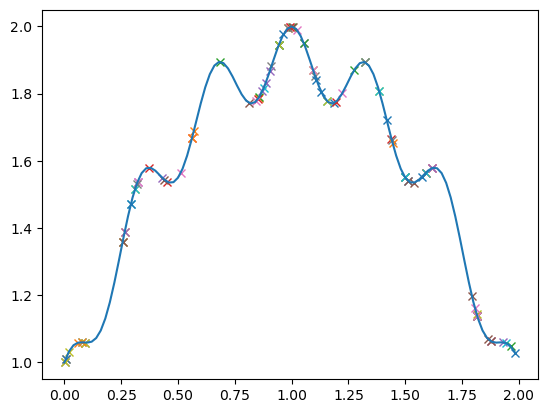

In [71]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

Il n'y a pas de grand changement car la probabilité de mutation est faible, mais c'est ainsi qu'elle doit être maintenue, sinon il serait impossible d'arriver à une solution. La mutation doit être très peu fréquente.

### Résultat final

In [72]:
generaciones = 100

for _ in range(generaciones):
    
    fitness =[]

    # j'extrais les valeurs de y pour mesurer leur succès
    for individuo in poblacion:
        x = listToDecimal(individuo)
        y = fx(x)
        fitness += [y]

    # je convertis fitness en un vecteur pour réaliser des opérations
    # plus facilement
    fitness = np.array(fitness)

    # je divise toutes les valeurs de y par la somme totale
    # pour obtenir des valeurs entre 0 et 1
    fitness=fitness/fitness.sum()    
        
    
    # les meilleurs individus se reproduisent
    offspring = []
    for i in range(size_poblacion//2):
        parents = np.random.choice(size_poblacion, 2, p=fitness)
        cross_point = np.random.randint(ind_size)
        offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
        offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]    
    
    poblacion = offspring
    
    #####
    # MUTATIONS
    ####
     
    mutate(poblacion,0.005,genetic_pool)

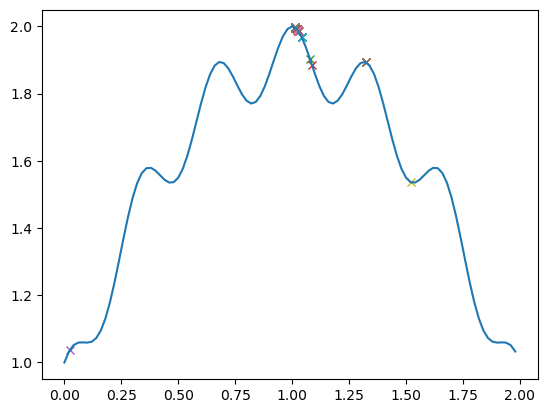

In [73]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

Après 100 générations, nous pouvons voir que la plupart des individus se concentrent sur la valeur maximale. Et si nous regardons le meilleur individu, nous verrons que sa valeur est proche de 1.

In [74]:
np.where(fitness == fitness.max())

(array([51]),)

In [75]:
listToDecimal(poblacion[41])

1.01299591147427

Le meilleur individu a une valeur de 0.97, donc après l'avoir passé dans la fonction, cela nous donne un résultat proche du maximum.

In [76]:
fx(listToDecimal(poblacion[41]))

1.9968456352827975

Nous pourrions les laisser se reproduire pendant quelques générations de plus pour voir s'ils continuent à progresser vers le maximum.

In [77]:
generaciones = 300

for _ in range(generaciones):
    
    fitness =[]

    # j'extrais les valeurs de y pour mesurer leur succès
    for individuo in poblacion:
        x = listToDecimal(individuo)
        y = fx(x)
        fitness += [y]

    # je convertis fitness en un vecteur pour réaliser des opérations
    # plus facilement
    fitness = np.array(fitness)

    # je divise toutes les valeurs de y par la somme totale
    # pour obtenir des valeurs entre 0 et 1
    fitness=fitness/fitness.sum()    
        
    
    # les meilleurs individus se reproduisent
    offspring = []
    for i in range(size_poblacion//2):
        parents = np.random.choice(size_poblacion, 2, p=fitness)
        cross_point = np.random.randint(ind_size)
        offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
        offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]    
    
    poblacion = offspring
    
    #####
    # MUTATIONS
    ####
     
    mutate(poblacion,0.005,genetic_pool)

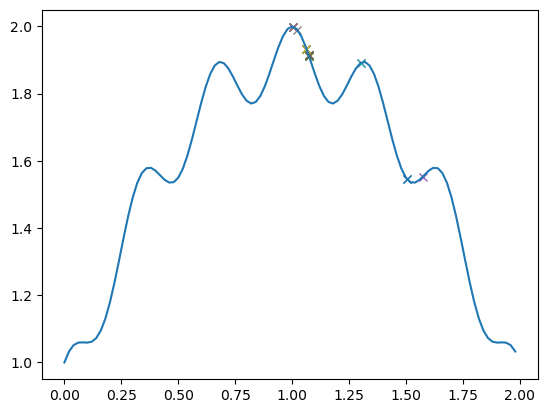

In [78]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

Après 300 générations, presque tous les individus sont proches du maximum.

In [79]:
listToDecimal(poblacion[np.where(fitness == fitness.max())[0][0]])

1.0739571402277102

Le meilleur individu reste seulement proche de 1, car son ADN n'est pas très stable et il est impossible d'obtenir la valeur exacte de 1. Cependant, cela est possible avec un ADN binaire.

## Individus avec un ADN binaire

Si nous faisons en sorte que l'ADN ne représente pas des nombres binaires, mais une division, alors l'individu sera beaucoup plus stable. Comme j'ai déjà expliqué l'essentiel de l'algorithme génétique, je ne vais pas trop m'attarder sur cette approche.

In [80]:
def bin_decimal(num_binario):
    return (np.sum(num_binario)/len(num_binario))*2

La fonction ci-dessus transforme une liste de nombres binaires en un nombre décimal allant de 0 à 2. La manière dont elle y parvient est assez simple : elle additionne tous les 1 de l'ADN, puis divise le résultat par la longueur de l'ADN. C'est très similaire au calcul du fitness. Cela renvoie un nombre entre 0 et 1 ; si ce nombre est multiplié par 2, nous avons maintenant un moyen de produire des nombres entre 0 et 2.

In [81]:
# résultat de la somme de tous les 1
individuo = [0,1,1,1,1,0]
bin_decimal(individuo)

1.3333333333333333

In [82]:
4/6 * 2

1.3333333333333333

Une fois cela fait, toutes les étapes ci-dessus s'appliquent de la même manière.

In [83]:
poblacion = []
genetic_pool = [0,1]
for i in range(100):
    individuo = list(np.random.choice(genetic_pool,15))
    poblacion.append(individuo)
poblacion[:10]

[[0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1],
 [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0],
 [1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1],
 [0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
 [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1],
 [1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1],
 [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1]]

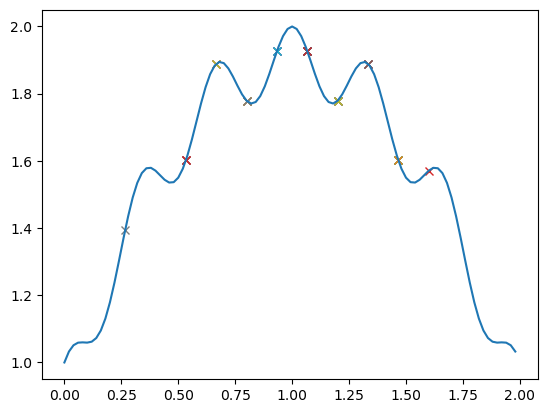

In [84]:
for individuo in poblacion:
    x = bin_decimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

À partir de ce point, vous devriez pouvoir vous en sortir.

<h3 style="color:#0056b3; text-decoration:underline;">Résultat et Interprétation</h3>

L’algorithme génétique a été appliqué pour maximiser une fonction non linéaire présentant plusieurs maxima locaux.  
Deux représentations du code génétique ont été testées : décimale et binaire. Dans les deux cas, l’algorithme a réussi à faire converger la population vers la zone optimale, autour de **x = 1**, où la fonction atteint son maximum.

Après plusieurs générations (jusqu’à 300), les individus les plus performants se sont stabilisés autour de la valeur optimale.  
La stratégie de sélection par fitness, combinée au croisement et à une faible probabilité de mutation, a permis une exploration efficace de l’espace de recherche tout en assurant la convergence.

Ce résultat démontre que l’algorithme génétique est particulièrement adapté pour explorer des espaces complexes, non convexes et riches en optima locaux, tout en restant simple à implémenter et robuste face à l’approximation.
